***SCT_ML_1 Uday Srivastava***

Importing Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Datasets

In [44]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')


#Exploring Data


In [45]:
train_df.shape

(1460, 81)

In [46]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
#Exploring Target - to be pridicted variable
description = train_df['SalePrice'].describe()
print(description)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [48]:
#Previewing Selected Features
train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath']].head()

,GrLivArea,BedroomAbvGr,FullBath
0,1710,3,2
1,1262,3,2
2,1786,3,2
3,1717,3,1
4,2198,4,2


In [49]:
#Checking for missing values in selected features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
train_df[features].isnull().sum()

,0
GrLivArea,0
BedroomAbvGr,0
FullBath,0


#Feature Selection

In [50]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = ['SalePrice']

x = train_df[features]
y = train_df[target]
x_test = test_df[features]

#Data Splitting

In [51]:
#Splitting train df into train and validation datasets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=40)

#Fitting Model

In [52]:
#Fitting Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#Validation set pridiction and evaluation

In [53]:
#Making prediction on validation dataset
y_val_pred = model.predict(x_val)

#Model Evaluation for validation
from sklearn.metrics import mean_absolute_error, mean_squared_error

MSE = mean_squared_error(y_val, y_val_pred)
RMSE = np.sqrt(MSE)
print('Root mean sq error is :', RMSE)

Root mean sq error is : 44792.03141655702


#Test set Prediction

In [54]:
#Making prediction on test dataset
y_test_pred = model.predict(x_test)

#Submission File Creation

In [55]:
submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice' : y_test_pred.ravel()}) # Convert y_test_pred to a 1D array using ravel() method
submission_df.to_csv('submission.csv', index=False)
print('Submission File Created')

Submission File Created


#Visualisation

Scatter Plot between Actual vs Predicted SalePrice for Validation Dataset

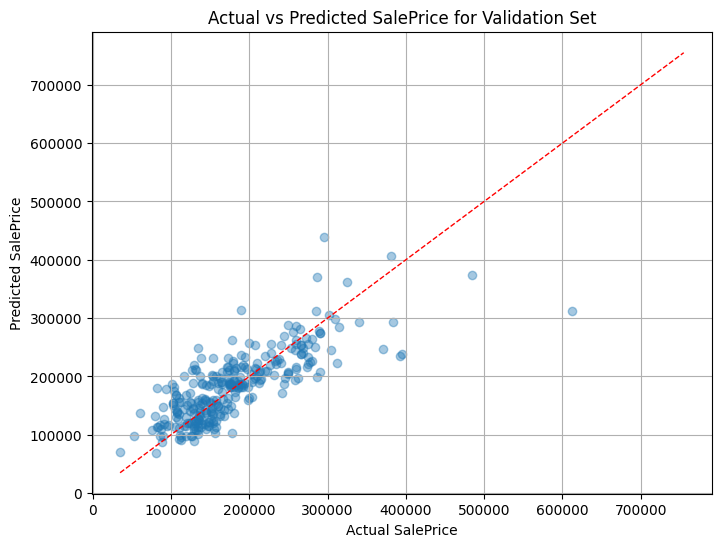

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_val_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=1)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice for Validation Set')
plt.grid(True)
plt.show()

Scatter Plot between Predicted Sale Price vs. Features for Test Dataset

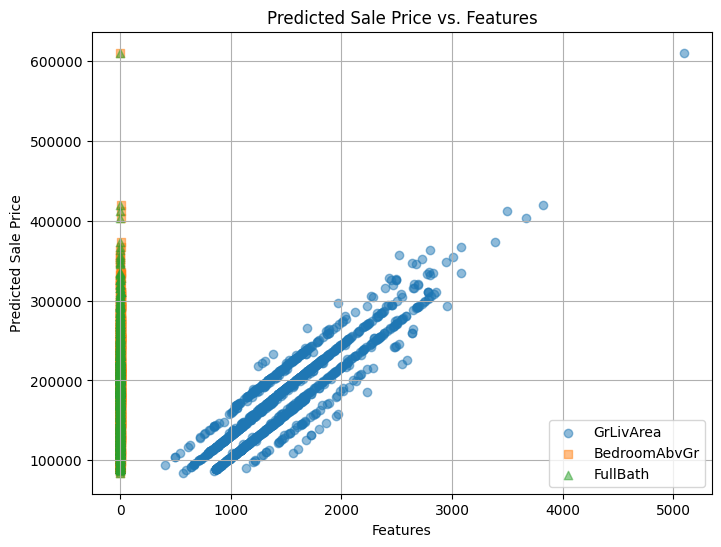

In [57]:
test_df['PredictedSalePrice'] = y_test_pred

plt.figure(figsize=(8, 6))

plt.scatter(test_df['GrLivArea'], test_df['PredictedSalePrice'], alpha=0.5, label='GrLivArea', marker='o')
plt.scatter(test_df['BedroomAbvGr'], test_df['PredictedSalePrice'], alpha=0.5, label='BedroomAbvGr', marker='s')
plt.scatter(test_df['FullBath'], test_df['PredictedSalePrice'], alpha=0.5, label='FullBath', marker='^')

plt.xlabel('Features')
plt.ylabel('Predicted Sale Price')
plt.title('Predicted Sale Price vs. Features')
plt.legend()
plt.grid(True)
plt.show()

Residual Plot

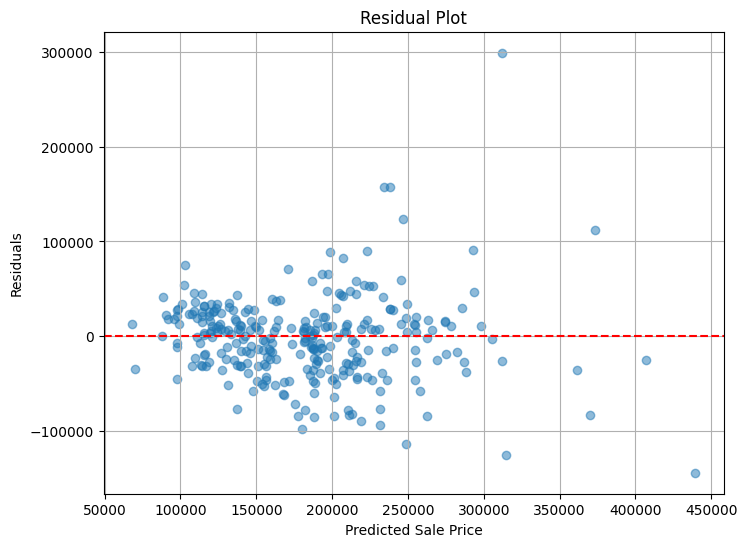

In [58]:
residuals = y_val.values.ravel() - y_val_pred.ravel()  # Calculate residuals

plt.figure(figsize=(8, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()